# Latent Probability Model

If you are running this for the first time you may need to use the following commands before continuing:

In [ ]:
!pip install pandas
!pip install spacy
!pip install spacytextblob
!python -m spacy download en_core_web_sm

!pip install newspaper3k

!pip install plotly

!pip install sklearn

Spacy: Used for NLP and has the machine learning module
    
SpacyTextBlob: Used for the sentiment analysis
    
Pandas: Stores the data as a dataframe table
    
NewsPaper: Used for web scraping
    
Requests: Makes the connection to the URL

In [1]:
from newspaper import Article
from random import shuffle
import re
import requests

from collections import Counter

import pandas as pd

import numpy as np
import json
import requests
import glob

#gensim
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary  # Import the Dictionary class from Gensim

#spacy
import spacy
from nltk.corpus import stopwords
from spacytextblob.spacytextblob import SpacyTextBlob

#vis
import pyLDAvis
import pyLDAvis.gensim
import plotly.express as px
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt 
import sklearn
from sklearn.manifold import TSNE

#K-Means Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

#Principled Component Analysis
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
%run SentimentAnalysis.ipynb
%run WebScraper.ipynb
%run PipelineHelpers.ipynb
%run TopicModeling.ipynb
%run DataVisualization.ipynb

# Pipeline Settings and Variables

IMPORTANT: If you want to try re-running after making some code changes or want to 
run a new .csv file through the code block below and the one a couple down with the
 rerun note will need to be ran again for the analysis to work correctly

In [3]:
# Loading the nlp pipeline and adding spacytextblob
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

IMPORTANT: Insert the .csv file you want to be read below.

In [4]:
#THIS IS THE CSV FILE THAT WE READ IN
#This csv file should contain a single column of article urls, with the first entry being "Articles"
csvFile = "urls.csv"

#THIS IS THE MINIMUM WORDS THAT WE ALLOW FOR AN ARTICLE (to prevent certain blocked articles or bad data)
wordCountFilter = 150


### Reading in the csv file and gathering a list of urls from it. Also setting some global variables

In [5]:
# rerun
# Using panda to load in our .csv file
df = pd.read_csv(csvFile) # File we are checking
urls = df["Address"].tolist() # Column name we are checking
all_text_gathered = []
all_articles = ''
scentence_list = []


# This is the pipeline. All code is called and ran through here.

In [6]:
# Loops through our URLS and scraps the data
# Put all empty dictionaries here
sentimentDic = {}
    
for count, x in enumerate(urls):
    if(count % 10 == 0): #layman's way of showing progress
        print(str(count))

    url = x

    # Send the URL to get scraped, returning the text of the article
    page_text = scrapeData(x)
    
    # All articles will have a long string of all the text that has been scraped
    all_articles = all_articles + " " +  page_text
    
    # Puts the article into a list of all the sentences in the article
    sentenceList = sentenceLevel(page_text)

    # Runs sentiment analysis. Will need to make a new function and a new dictionary
    # for each type of analysis we want to run. Will pass in the page_text, the dic, and
    # x (the url)
    sentimentDic = sentimentAnalysis(page_text, sentimentDic, url)
        
        
# For each analysis we run we need to then convert that dictionary with the following method
df = dictionaryToDataFrame(sentimentDic)
df
# Used if we want to convert it to a .csv sentDic.to_csv("sentiment130.csv")


0
word count  236
repeated phrases 6
https://www.reuters.com/world/us/us-army-discharge-soldiers-who-refuse-covid-19-vaccine-2022-02-02/
10
Error in scrapeData
https://nationalpost.com/news/national/defence-watch/military-leaders-saw-pandemic-as-unique-opportunity-to-test-propaganda-techniques-on-canadians-forces-report-says/wcm/22733c97-39f0-4ba4-8a26-478af5e215f3?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1632748542
word count  1
repeated phrases 0
https://t.me/NewsmaxTV/6142
word count  102
repeated phrases 3
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4368609/
word count  1
repeated phrases 0
https://tass.ru/armiya-i-opk/14598087
20
Error in scrapeData
https://academic.oup.com/epirev/article/28/1/3/567796
word count  31
repeated phrases 1
https://www.projectveritas.com/video/military-documents-about-gain-of-function-contradict-fauci-testimony-under/
word count  14
repeated phrases 1
https://rumble.com/vy0brv-1.5-hours-of-vaccine-adverse-reactions.html
Error in 

,URL,Sentiment Score,Sentiment Label,Subjectivity Score,Positive Words,Negative Words,Text
0,https://www.thegatewaypundit.com/2022/05/world...,0.05,Neutral Positive,0.28,"not, new, confident, free, more, near, effecti...","needless, single, absolutely, past, other","this week, global elitists and world leaders f..."
1,https://gettr.com/post/ptt4ta7c84,0.00,PARERROR: SocialError,0.00,,,PARERROR: SocialError
2,https://komonews.com/news/coronavirus/if-covid...,0.06,Neutral Positive,0.36,"legal, social, able, no, free, more, first, la...","failed, active, complaint, firm, absolutely, e...",president joe biden recently declared but unva...
3,https://www.lewrockwell.com/2018/11/no_author/...,0.10,Neutral Positive,0.41,"many, far, early, able, no, more, first, effec...","typically, frightening, long, killed, worse, p...",the “spanish flu” killed an estimated 50-100 m...
4,https://nation.com.pk/08-Apr-2021/russia-offer...,0.07,Neutral Positive,0.28,"natural, economic, ready, new, significant, pa...","military, actively, foreign, mainly",islamabad - russia on wednesday assured pakist...
5,https://barrie.ctvnews.ca/cfb-borden-based-mil...,-0.02,Neutral Negative,0.38,"not, good, first, fine, unique, full, willingly","not, very, base, guilty, wrong, due, sorry, mi...",a canadian armed forces officer who urged othe...
6,https://www.reuters.com/world/us/us-army-disch...,0.00,PARERROR: WebBlockerError,0.00,,,PARERROR: WebBlockerError
7,https://www.dailysabah.com/world/europe/sweden...,0.03,Neutral Negative,0.30,"new, directly, light, first, direct, kind","active, foreign, long, green, military, previo...",sweden will break its doctrine of not sending ...
8,https://www.military.com/daily-news/2022/11/01...,0.07,Neutral Positive,0.46,"most, new, latest, developed, legal, sincerely...","limited, active, previous, base, firm, militar...",the air force is allowing instructors who rema...
9,https://roundingtheearth.substack.com/p/defini...,0.09,Neutral Positive,0.41,"many, particular, great, high, advanced, able,...","hidden, not, long, average, little, mental, te...",we need for members of congress and other amer...


# Dropping failed webscraping rows

In [7]:
df = drop_failed_webscraping_rows(df)
df

,URL,Sentiment Score,Sentiment Label,Subjectivity Score,Positive Words,Negative Words,Text
0,https://www.thegatewaypundit.com/2022/05/world...,0.05,Neutral Positive,0.28,"not, new, confident, free, more, near, effecti...","needless, single, absolutely, past, other","this week, global elitists and world leaders f..."
2,https://komonews.com/news/coronavirus/if-covid...,0.06,Neutral Positive,0.36,"legal, social, able, no, free, more, first, la...","failed, active, complaint, firm, absolutely, e...",president joe biden recently declared but unva...
3,https://www.lewrockwell.com/2018/11/no_author/...,0.10,Neutral Positive,0.41,"many, far, early, able, no, more, first, effec...","typically, frightening, long, killed, worse, p...",the “spanish flu” killed an estimated 50-100 m...
4,https://nation.com.pk/08-Apr-2021/russia-offer...,0.07,Neutral Positive,0.28,"natural, economic, ready, new, significant, pa...","military, actively, foreign, mainly",islamabad - russia on wednesday assured pakist...
5,https://barrie.ctvnews.ca/cfb-borden-based-mil...,-0.02,Neutral Negative,0.38,"not, good, first, fine, unique, full, willingly","not, very, base, guilty, wrong, due, sorry, mi...",a canadian armed forces officer who urged othe...
7,https://www.dailysabah.com/world/europe/sweden...,0.03,Neutral Negative,0.30,"new, directly, light, first, direct, kind","active, foreign, long, green, military, previo...",sweden will break its doctrine of not sending ...
8,https://www.military.com/daily-news/2022/11/01...,0.07,Neutral Positive,0.46,"most, new, latest, developed, legal, sincerely...","limited, active, previous, base, firm, militar...",the air force is allowing instructors who rema...
9,https://roundingtheearth.substack.com/p/defini...,0.09,Neutral Positive,0.41,"many, particular, great, high, advanced, able,...","hidden, not, long, average, little, mental, te...",we need for members of congress and other amer...
11,https://childrenshealthdefense.org/defender/he...,0.10,Neutral Positive,0.40,"many, able, first, overwhelming, real, healthy...","not, forced, minimal, long, painful, physicall...","heather elkins, 45, couldn’t get a medical exe..."
14,https://www.foxnews.com/us/pentagon-rushed-den...,0.00,Neutral Negative,0.42,"quick, greater, general","less, single, average, military, partial, other",a pentagon report found the military was likel...


# TOPIC MODELING

# Create Topic Model w/ Highest Coherence

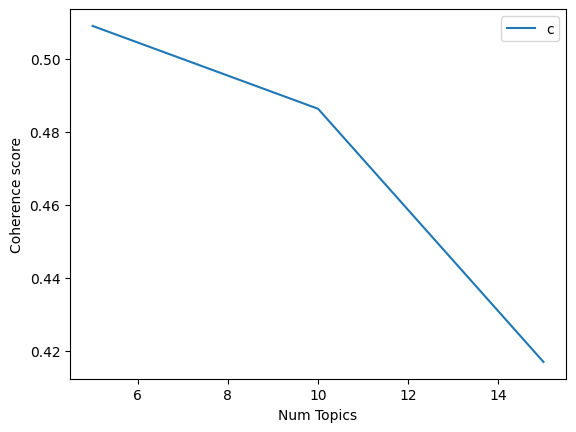

In [8]:
#This will generate multiple topic models with various topic count, then return the model with highest coherence
#it will also display a quick visual of coherence values, to understand what topic count is best and why it was chosen
LDA_model, corpus = create_lda_model(df, 20, 5, 5)

#LDA_model is the lda model we will work with, corpus is the actual corpus of articles we use
LDA_model

In [9]:
topic_dict = topic_level_sentiment(LDA_model)
topic_dict

{'Topic_0': ['exemption',
  'military',
  'medical',
  'service',
  'member',
  'religious',
  'request',
  'decision',
  'vaccination',
  'mandate'],
 'Topic_1': ['force',
  'military',
  'vaccination',
  'order',
  'officer',
  'canadian',
  'member',
  'say',
  'armed',
  'charge'],
 'Topic_2': ['category',
  'datum',
  'code',
  'diagnostic',
  'ambulatory',
  'summary',
  'revise',
  'look',
  'large',
  'illness'],
 'Topic_3': ['say',
  'elkin',
  'polio',
  'disease',
  'country',
  'get',
  'flu',
  'year',
  'people',
  'spanish'],
 'Topic_4': ['air',
  'force',
  'religious',
  'say',
  'exemption',
  'member',
  'pilot',
  'release',
  'military',
  'medical']}

# DATA VISUALIZATION

## Pre-processing dataframe for visualization

In [10]:
#making a new dataframe 
#df_main_topic = add_main_topic_dataframe(df, LDA_model, corpus)

df_main_topic = preprocess_dataframe_for_datavis(df, LDA_model, corpus)

df_main_topic


,URL,Sentiment Score,Sentiment Label,Subjectivity Score,Positive Words,Negative Words,Text,Topics,Main Topic,Main Topic Score,Shortened Address
28,https://technofog.substack.com/p/our-woke-mili...,0.05,Neutral Positive,0.35,"natural, original, more, light, first, top, ce...","less, spent, wide, actively, subtle, least, pa...",the military is waging a two-front war on its ...,"[(0, 0.99777746)]",0,0.997777,technofog.substac
19,https://www.health.mil/Military-Health-Topics/...,0.05,Neutral Positive,0.23,"many, particular, directly, kind, professional...","not, previous, center, seriously, military, other",vaccination programs are important to military...,"[(0, 0.9976342)]",0,0.997634,www.health.mil/Mi
14,https://www.foxnews.com/us/pentagon-rushed-den...,0.00,Neutral Negative,0.42,"quick, greater, general","less, single, average, military, partial, other",a pentagon report found the military was likel...,"[(0, 0.9951185)]",0,0.995118,www.foxnews.com/u
25,https://bit.ly/3L0oHZp,0.17,Positive,0.42,"new, economic, able, free, welcome, available,...","military, mental","norfolk, va. (wavy) – 10 on your side has conf...","[(1, 0.99403924)]",1,0.994039,bit.ly/3L0oHZp
0,https://www.thegatewaypundit.com/2022/05/world...,0.05,Neutral Positive,0.28,"not, new, confident, free, more, near, effecti...","needless, single, absolutely, past, other","this week, global elitists and world leaders f...","[(1, 0.9965901)]",1,0.996590,www.thegatewaypun
5,https://barrie.ctvnews.ca/cfb-borden-based-mil...,-0.02,Neutral Negative,0.38,"not, good, first, fine, unique, full, willingly","not, very, base, guilty, wrong, due, sorry, mi...",a canadian armed forces officer who urged othe...,"[(1, 0.9978411)]",1,0.997841,barrie.ctvnews.ca
9,https://roundingtheearth.substack.com/p/defini...,0.09,Neutral Positive,0.41,"many, particular, great, high, advanced, able,...","hidden, not, long, average, little, mental, te...",we need for members of congress and other amer...,"[(2, 0.9992188)]",2,0.999219,roundingtheearth.
26,https://fox40.com/news/political-connection/ho...,0.01,Neutral Negative,0.40,"far, very, complete, quickly, offers, large, t...","complicated, drag, late, least, difficult, oth...",this is an archived article and the informatio...,"[(2, 0.9974802)]",2,0.997480,fox40.com/news/po
7,https://www.dailysabah.com/world/europe/sweden...,0.03,Neutral Negative,0.30,"new, directly, light, first, direct, kind","active, foreign, long, green, military, previo...",sweden will break its doctrine of not sending ...,"[(3, 0.99420327)]",3,0.994203,www.dailysabah.co
27,https://www.washingtonpost.com/history/2020/04...,-0.01,Neutral Negative,0.42,"many, most, new, success, right, okay, hazardo...","complicated, sick, little, killed, desperately...",share comment on this story comment\non aug. 3...,"[(3, 0.9986446)]",3,0.998645,www.washingtonpos


## Visualize all articles on their main topic

In [12]:
visualize_all_articles_on_main_topic(df_main_topic)

# Generating Cluster Graph of Topics

In [15]:
visualize_topic_cluster_TSNE(LDA_model, df_main_topic)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 17 samples in 0.001s...
[t-SNE] Computed neighbors for 17 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 17 / 17
[t-SNE] Mean sigma: 0.761111
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.412525
[t-SNE] KL divergence after 1000 iterations: 0.055277


## Subjectivity vs Sentiment of Articles for a single topic

In [18]:
visualize_single_topic_subjectivity_vs_sentiment(df_main_topic, 0)

visualize_single_topic_subjectivity_vs_sentiment(df_main_topic, 4)

## K means Clustering

Important articles and learning for kmeans

In [ ]:
#https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6
#https://scikit-learn.org/stable/modules/clustering.html#k-means


In [20]:
df_topics = generate_topic_relevancy_dataframe(LDA_model)

df_topics

,0,1,2,3,4
0,0.000853,0.996590,0.000853,0.000853,0.000850
1,0.001489,0.001481,0.001479,0.001484,0.994066
2,0.000275,0.000275,0.000278,0.998897,0.000275
3,0.000708,0.000710,0.000712,0.997164,0.000706
4,0.000539,0.997841,0.000538,0.000540,0.000541
5,0.001451,0.001448,0.001439,0.994203,0.001459
6,0.000603,0.000600,0.000600,0.000601,0.997595
7,0.000195,0.000195,0.999219,0.000196,0.000195
8,0.000353,0.000349,0.000350,0.998598,0.000351
9,0.995117,0.001214,0.001216,0.001219,0.001234


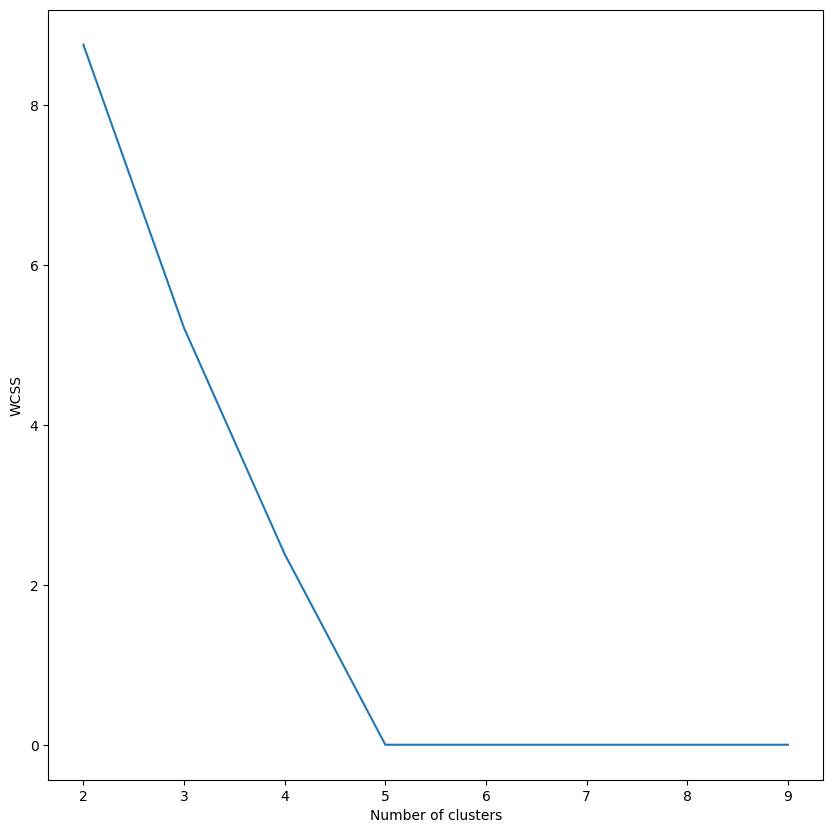

In [24]:
visualize_optimal_cluster_count(df_topics= df_topics, max_clusters= 10,pca_components= 5)

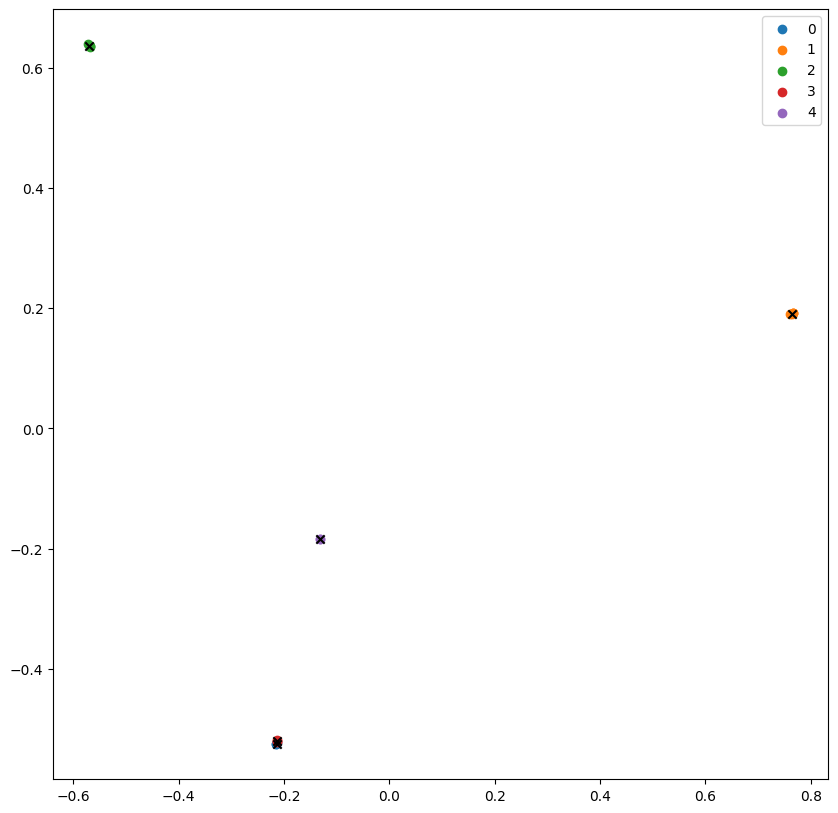

In [26]:
visualize_kmeans_clustering(df_topics= df_topics, num_clusters = 5, pca_components = 5)